In [152]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set() # setting seaborn default for plots

import matplotlib.pyplot as plt
%matplotlib inline


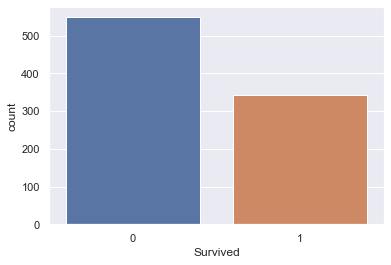

In [153]:
# Dependicies added 
# Ugurkan Ates 20 July 2019

# Read train  and test data using panda
data = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

sns.countplot(x='Survived', data=data)
plt.show()



So far read data and shown how many died  and head of data gives info.

891 data in Trainset /  12 columns .  ID is useless,  Survived is not feature rather output so 10 feature so far.

In [154]:
data.shape

(891, 12)

Now i have to create a Feature vector to use it later. Let's take look for each feature and comment on them.



Data Dictionary

Survived: 0 = No, 1 = Yes  = No modification. ## OUTPUT - to train

pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd = No modification , number form & scale is good enough.


sex = male female needs to be 0,1 

age = maybe use 0-1-2-4 = baby kid etc.. , age is also missing but not much. fill with means of each sex. 


sibsp: # of siblings / spouses aboard the Titanic  

parch: # of parents / children aboard the Titanic

combine sibsp and parch to Family? 
fare  = Needs to be adjusted / scaled.
name = Mr,Mrs,Mister,Miss can be identified as family thingy

ticket: Ticket number = Seems useless ?

cabin: Cabin number =  useless for now , missing lot.

embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In [155]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [156]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

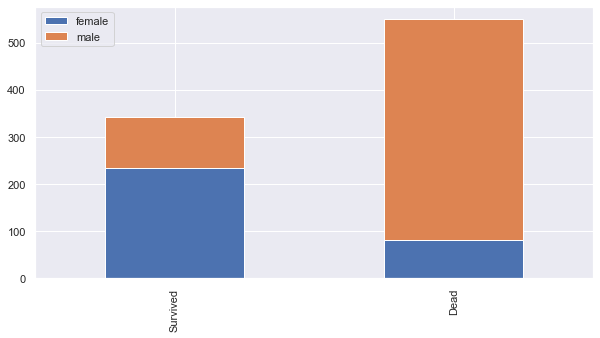

In [157]:
bar_chart("Sex")
# shows most man died while females survived mostly.


In [158]:
# For Name let's make it useful. We will get titles of names with Regular expression strings ends with . 
data['Name'].value_counts()

train_test_data = [data,test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [159]:
# Mr , Miss, Mrs and Rest are Category.
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [160]:
# inplace means True = modify same object, false means returns object which modified
data.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)


data.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)


In [161]:
title_sex_map = {"male" : 0 , "female" : 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(title_sex_map)

In [162]:
#train["Age"].fillna(
data["Age"].fillna(data.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


In [163]:
data.head(30)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,C,2


In [164]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    
# age classing them into different scales which fits our data.

In [165]:
emb_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(emb_mapping)

In [166]:
# fill missing Fare with according to Where they sitted ( P CLASS gives that)
data["Fare"].fillna(data.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

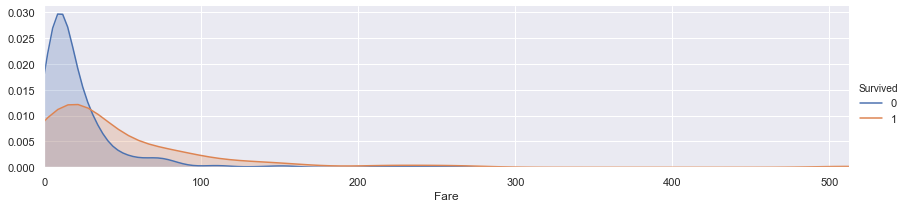

In [167]:
data["Fare"]
# need graphic to see which are limits for each category
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, data['Fare'].max()))
facet.add_legend()
 
plt.show()

In [168]:

for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [169]:
# Family sizes without person itself. 
data["FamilySize"] = data["SibSp"] + data["Parch"] 
test["FamilySize"] = test["SibSp"] + test["Parch"] 

data.drop('SibSp', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)

data.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

data.drop('Parch', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)
# y VALUE 
data.drop('PassengerId', axis=1, inplace=True)

train_data = data.drop('Survived', axis=1)

target = data['Survived']


In [173]:

# Importing Classifier Modules hence this is Classifier model. 
# My Cheat Sheat by Sk learn said Linear SVC would be best fit / model but lets see?
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

# Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

pd.isnull(train_data).sum() > 0

#train_data.info()
#test.info()

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
 #   print(train_data)

Pclass        False
Sex           False
Age           False
Fare          False
Embarked      False
Title         False
FamilySize    False
dtype: bool

In [176]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# kNN Score
round(np.mean(score)*100, 2)

[0.82222222 0.76404494 0.80898876 0.83146067 0.80898876 0.83146067
 0.84269663 0.79775281 0.83146067 0.82022472]


81.59

In [177]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# decision tree Score
round(np.mean(score)*100, 2)

[0.8        0.82022472 0.76404494 0.75280899 0.87640449 0.75280899
 0.85393258 0.79775281 0.74157303 0.82022472]


79.8

In [178]:

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Random Forest Score
round(np.mean(score)*100, 2)

[0.76666667 0.82022472 0.83146067 0.7752809  0.86516854 0.7752809
 0.83146067 0.80898876 0.76404494 0.82022472]


80.59

In [179]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

# Naive Bayes Score
round(np.mean(score)*100, 2)

[0.81111111 0.76404494 0.80898876 0.78651685 0.74157303 0.80898876
 0.83146067 0.82022472 0.82022472 0.83146067]


80.25

In [181]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100,2)


/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

[0.81111111 0.79775281 0.82022472 0.82022472 0.84269663 0.82022472
 0.82022472 0.84269663 0.84269663 0.85393258]


/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", F

82.72

In [182]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

submission = pd.read_csv('submission.csv')
submission.head()

/home/paypaytr/anaconda3/envs/machineLearning/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
